In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
pima=pd.read_csv("pima-indians-diabetes-data.csv")

In [3]:
pima.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima.shape

(768, 9)

In [6]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col1    768 non-null    int64  
 1   Col2    768 non-null    int64  
 2   Col3    768 non-null    int64  
 3   Col4    768 non-null    int64  
 4   Col5    768 non-null    int64  
 5   Col6    768 non-null    float64
 6   Col7    768 non-null    float64
 7   Col8    768 non-null    int64  
 8   Target  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
pima.isna().sum()

Col1      0
Col2      0
Col3      0
Col4      0
Col5      0
Col6      0
Col7      0
Col8      0
Target    0
dtype: int64

In [8]:
pima.Target.unique()

array([1, 0], dtype=int64)

In [15]:
pima.corr()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Target
Col1,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Col2,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Col3,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Col4,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Col5,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
Col6,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Col7,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Col8,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Target,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

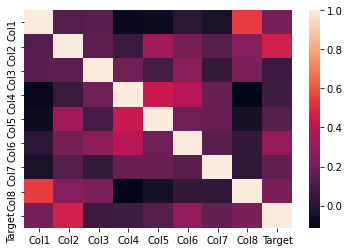

In [13]:

sns.heatmap(pima.corr())

In [16]:
from sklearn.preprocessing import normalize

In [34]:
pima.iloc[::,:8]

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [33]:
p1=pima.iloc[::,:8]

# Normalize , then knn

In [35]:
df1=preprocessing.normalize(p1)
df1

array([[0.03355237, 0.82762513, 0.40262844, ..., 0.18789327, 0.00350622,
        0.27960308],
       [0.008424  , 0.71604034, 0.55598426, ..., 0.22407851, 0.00295683,
        0.26114412],
       [0.04039768, 0.92409698, 0.32318146, ..., 0.11765825, 0.00339341,
        0.16159073],
       ...,
       [0.02691539, 0.65135243, 0.38758161, ..., 0.14103664, 0.00131885,
        0.16149234],
       [0.00665306, 0.83828547, 0.39918356, ..., 0.20025708, 0.00232192,
        0.31269379],
       [0.00791454, 0.73605211, 0.55401772, ..., 0.24060198, 0.00249308,
        0.18203439]])

In [36]:
df=pd.DataFrame(df1,columns=["col1","col2","col3","col4","col5","col6","col7","col8"])

In [37]:
df

,col1,col2,col3,col4,col5,col6,col7,col8
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655
...,...,...,...,...,...,...,...,...
763,0.042321,0.427443,0.321640,0.203141,0.761779,0.139236,0.000724,0.266623
764,0.013304,0.811526,0.465629,0.179600,0.000000,0.244788,0.002262,0.179600
765,0.026915,0.651352,0.387582,0.123811,0.602905,0.141037,0.001319,0.161492
766,0.006653,0.838285,0.399184,0.000000,0.000000,0.200257,0.002322,0.312694


In [38]:
df.corr()

,col1,col2,col3,col4,col5,col6,col7,col8
col1,1.000000,0.198995,0.197285,-0.094959,-0.356602,0.179087,0.011890,0.559704
col2,0.198995,1.000000,0.087082,-0.313936,-0.766002,0.218235,0.083910,0.345316
col3,0.197285,0.087082,1.000000,0.181935,-0.475787,0.494782,0.131004,0.395350
col4,-0.094959,-0.313936,0.181935,1.000000,0.220035,0.261491,0.114536,-0.140723
col5,-0.356602,-0.766002,-0.475787,0.220035,1.000000,-0.507245,-0.136174,-0.635447
col6,0.179087,0.218235,0.494782,0.261491,-0.507245,1.000000,0.227208,0.367872
col7,0.011890,0.083910,0.131004,0.114536,-0.136174,0.227208,1.000000,0.162969
col8,0.559704,0.345316,0.395350,-0.140723,-0.635447,0.367872,0.162969,1.000000


In [39]:
from sklearn.model_selection import train_test_split

In [45]:
X=df.iloc[:,:8]
X.head()

,col1,col2,col3,col4,col5,col6,col7,col8
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655


In [46]:
y=pima.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Target, dtype: int64

In [47]:
X_train , X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


In [49]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_predict=knn.predict(X_test)

In [50]:
y_predict

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,y_predict)
accuracy

0.6926406926406926

In [52]:
matrix= confusion_matrix(y_test.values,y_predict)
matrix

array([[118,  28],
       [ 43,  42]], dtype=int64)

In [54]:
output=pd.DataFrame(data=[y_test.values,y_predict],index=["y_test","y_predict"])
output.T[0:5]

,y_test,y_predict
0,0,1
1,0,1
2,0,1
3,0,0
4,0,0


# Without Normalize , knn

In [56]:
pima.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
X=pima.iloc[:,:8]
X.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [58]:
y=pima.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Target, dtype: int64

In [59]:
X_train , X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


In [60]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_predict=knn.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,y_predict)
accuracy

0.7359307359307359

In [62]:
matrix= confusion_matrix(y_test.values,y_predict)
matrix

array([[124,  22],
       [ 39,  46]], dtype=int64)

In [64]:
output=pd.DataFrame(data=[y_test.values,y_predict],index=["y_test","y_predict"])
output.T[0:5]

,y_test,y_predict
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


## Standard Scale then knn

In [65]:
X

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [66]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Target, Length: 768, dtype: int64

In [67]:
X= preprocessing.StandardScaler().fit_transform(pima)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [72]:
X_train , X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 9)
(537,)
(231, 9)
(231,)


In [73]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_predict=knn.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,y_predict)
accuracy

0.9913419913419913

In [75]:
matrix= confusion_matrix(y_test.values,y_predict)
matrix

array([[144,   0],
       [  2,  85]], dtype=int64)

In [76]:
output=pd.DataFrame(data=[y_test.values,y_predict],index=["y_test","y_predict"])
output.T[0:5]

,y_test,y_predict
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0


# Logistic Regression

In [77]:
X=pima.iloc[::,:8]
X

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [80]:
y=pima.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Target, dtype: int64

In [81]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [82]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [83]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression()

In [84]:
lg.fit(X_train,y_train)

C:\Users\Aniket kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
y_pred=lg.predict(X_test) 

In [87]:
pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': lg.predict( X_test ) } )

In [91]:
pred.head()

,actual,predicted
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0


In [90]:

cm = metrics.confusion_matrix( pred.actual,
                            pred.predicted)
cm

array([[95, 28],
       [24, 45]], dtype=int64)

In [92]:
score = metrics.accuracy_score( pred.actual, pred.predicted )
round( float(score), 2 )

0.73

Text(0.5, 15.0, 'Predicted label')

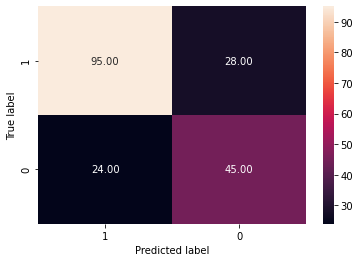

In [94]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [1,0] , yticklabels = [1,0])
plt.ylabel('True label')
plt.xlabel('Predicted label')